<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


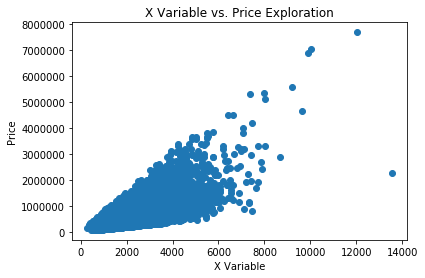

In [2]:
# testing some x variables on scatter plot

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df.sqft_living, df.price)
plt.ylabel("Price")
plt.xlabel("X Variable")
plt.title("X Variable vs. Price Exploration")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df['sqft_living'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.5)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1)
(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_[0])
print("\n Intercept: ", model.intercept_)

Coefficient: 
 287.77429055519383

 Intercept:  -57724.2318246495


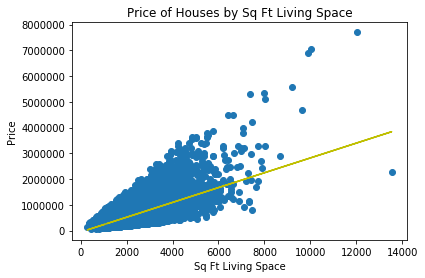

In [5]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color='y')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Sq Ft Living Space")
plt.title("Price of Houses by Sq Ft Living Space")
plt.show()

In [6]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

# R^2 is 49%, not strong for predicting housing prices

MSE is 64776859225.51665
RMSE is 254512.98439473897
R^2 is 0.4899785366840046


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [7]:
import seaborn as sns

sns.__version__

'0.9.0'

In [32]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 4.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


In [8]:
y2 = df.loc[:, ['price']].values
X2 = df.loc[:, ['sqft_living', 'grade']].values

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,y2, test_size=.5, random_state=42)

print(X2.shape)

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(21613, 2)
(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


In [9]:
model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

beta_0 = model2.intercept_
beta_i = model2.coef_[0]

print("Coefficient: \n", beta_i)
print("\n Intercept: ", beta_0)

Coefficient: 
 [   167.10832275 103065.16259903]

 Intercept:  [-599835.66185812]


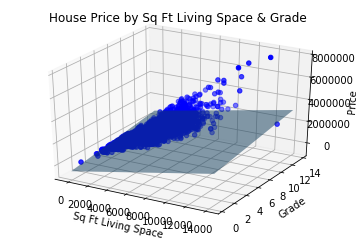

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='blue')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("House Price by Sq Ft Living Space & Grade")
plt.ylabel("Grade")
plt.xlabel("Sq Ft Living Space")
ax.set_zlabel("Price")

plt.show()

In [12]:
y2_test_predict = model2.predict(X2_test)

MSE2 = mean_squared_error(Y2_test, y2_test_predict)

RMSE2 = (np.sqrt(mean_squared_error(Y2_test, y2_test_predict)))

print('MSE is {}'.format(MSE2))
print('RMSE is {}'.format(RMSE2))

R22 = r2_score(Y2_test, y2_test_predict)

print('R^2 is {}'.format(R22))

# Adding the second variable hardly helped our r2 score

MSE is 70544952427.10252
RMSE is 265602.9977750675
R^2 is 0.5263921128006677


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [13]:
y3 = df['price']
X3 = df.drop(columns=['price','id','date','sqft_basement','yr_built'], axis=1)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, y3, test_size=.5, random_state=42)

print(X3.shape, "\n")

print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

X3_train.head()

(21613, 16) 

(10806, 16)
(10807, 16)
(10806,)
(10807,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
493,5,2.50,2820,14062,2.0,0,0,4,7,2380,0,98034,47.7081,-122.215,1910,10392
4253,4,3.25,2880,35315,1.0,0,0,3,11,2270,0,98005,47.6587,-122.163,1910,167378
18621,5,3.50,2450,8193,2.0,0,0,3,9,2450,0,98028,47.7721,-122.241,2310,8193
1463,2,1.00,970,4284,1.0,0,0,3,7,970,0,98103,47.6667,-122.333,2050,4284
12026,3,1.75,2090,8910,1.0,0,0,3,8,1230,0,98034,47.7149,-122.222,2310,10695


In [14]:
model3 = LinearRegression()
model3.fit(X3_train, Y3_train)

print("Coefficient: \n", model3.coef_)
print("\n Intercept: ", model3.intercept_)

Coefficient: 
 [-2.88553492e+04  5.45464650e+03  1.51185039e+02  1.97219809e-01
 -1.91359620e+04  5.74876876e+05  5.93324152e+04  5.06130152e+04
  8.33235332e+04  2.44658008e+01  6.26041445e+01 -4.10136247e+02
  6.63072225e+05 -2.98671996e+05  3.09765719e+01 -3.96149864e-01]

 Intercept:  -28412253.599683717


In [16]:
y3_test_predict = model3.predict(X3_test)

MSE3 = mean_squared_error(Y3_test, y3_test_predict)

RMSE3 = (np.sqrt(mean_squared_error(Y3_test, y3_test_predict)))

print('MSE is {}'.format(MSE3))
print('RMSE is {}'.format(RMSE3))

R23 = r2_score(Y3_test, y3_test_predict)

print('R^2 is {}'.format(R23))

# r2 is improving but still not fantastic

MSE is 49285888590.9079
RMSE is 222004.25354237674
R^2 is 0.6691161484813224


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
